# Pandas

**Подготовлена к.х.н. Бердюгиным Семёном Николаевичем**

Pandas - открытая библиотека, предоставляющая высокпроизводительные удобные инструменты для работы с данными. Библиотека поставляется в стандартном наборе дистрибутива anaconda. <a href='https://pandas.pydata.org/docs/index.html'>Ссылка на документацию</a>.

Для использования `Pandas` импортируется в код обычным методом. По общей договоренности чаще всего его импортируют как `pd`.

In [2]:
import pandas as pd

## Основные классы для хранения данных в Pandas

`pd.DataFrame` явдяется основным классом в Pandas. По логике своего устройства каждый объект класса `DataFrame` является таблицей.



Каждая колонка, в свою очередь представляет из себя объект класса `pd.Series`.

Создадим пустой объект `pd.DataFrame`

In [3]:
panob=pd.DataFrame()
print(type(panob))

<class 'pandas.core.frame.DataFrame'>


В качестве аргумента `pd.DataFrame()` может быть любой массив с данными - строки, числа, списки и тд. Сделаем массив из 2 списков. Каждая строка и колонка имеет свой индекс.

In [4]:
datalist = ['a','b','c',1,2,3]
panob = pd.DataFrame([datalist,datalist[:-1]])
print([datalist,datalist[:-1]], end='\n\n\n')

print('объекты DataFrame выводятся вместе с индексами.')
print('пустые ячейки заполняются NaN\n')
print(panob)

[['a', 'b', 'c', 1, 2, 3], ['a', 'b', 'c', 1, 2]]


объекты DataFrame выводятся вместе с индексами.
пустые ячейки заполняются NaN

   0  1  2  3  4    5
0  a  b  c  1  2  3.0
1  a  b  c  1  2  NaN


К элементам `pd.DataFrame` можно обращаться по индексу и брать срезы, как и с любыми итерируемыми объектами. 

Выведем `panob[0]` - первую колонку созданного объекта (тип объекта `pd.Series`)

In [5]:
print(type(panob[0]), end='\n\n\n')
print(panob[0], end='\n\n\n')

#печатаем 0 элемент 0 элемента датафрейма, иными словами datalist[0]
print(panob[0][0])

#таким образом, в датафрейм можно загружать любые объекты, 
#каждый объект обрабатывать согласно его свойствам

<class 'pandas.core.series.Series'>


0    a
1    a
Name: 0, dtype: object


a


Именой аргумент `index` в `pd.DataFrame(index=)` позволяет присвоить индексам свои значения

In [6]:
import numpy as np

i=pd.DataFrame([2,4,6,8,10,12])
i_np=np.arange(1,13,2)
datalist = ['a','b','c',1,2,3]
panob1 = pd.DataFrame(datalist)
print(panob1, end='\n\n\n')

panob2 = pd.DataFrame(datalist,index=i_np)
print(panob2)

   0
0  a
1  b
2  c
3  1
4  2
5  3


    0
1   a
3   b
5   c
7   1
9   2
11  3


# Изменение DataFrame

## Дополнение объекта

Объекты `DataFrame` имеют несколько методов модификации. Для добавления данных в таблицу можно использовать метод `append` или функцию `pd.concat`.

Создадим новую таблицу просто добавив в нее дополнительные записи

In [7]:
panob3=panob1.append(i)#добовляем записи из i к старому panob1
print(panob3, end='\n\n\n')
#можно наоборот
panob3=i.append(panob1)
print(panob3)

    0
0   a
1   b
2   c
3   1
4   2
5   3
0   2
1   4
2   6
3   8
4  10
5  12


    0
0   2
1   4
2   6
3   8
4  10
5  12
0   a
1   b
2   c
3   1
4   2
5   3


Также объединения с настраиваемыми параметрами можно использовать функцию `pd.concat`. Мы рассмотрим только два ключевых аргумента 

`objs` - список для объединения

`axis` - ось вдоль которой объединять (0 - допишем в конце, 1 - добавим колонку)

пустые ячейки будут заполнены `NaN`. Более подробное описание можно найти в документации.

In [8]:
panob4=pd.concat([i,panob2],axis=0)#аналогично panob3=i.append(panob2)

#объединяем индексы таблиц i и panob1.
#Появляются NaN потому что в исходных данных нет элементов
#с соответствуюзими индексами
panob5=pd.concat([i,panob2],axis=1)
panob6=pd.concat([panob2,i],axis=1)

print(panob4, end='\n\n\n')
print(panob5, end='\n\n\n')
print(panob6)

     0
0    2
1    4
2    6
3    8
4   10
5   12
1    a
3    b
5    c
7    1
9    2
11   3


       0    0
0    2.0  NaN
1    4.0    a
2    6.0  NaN
3    8.0    b
4   10.0  NaN
5   12.0    c
7    NaN    1
9    NaN    2
11   NaN    3


      0     0
0   NaN   2.0
1     a   4.0
2   NaN   6.0
3     b   8.0
4   NaN  10.0
5     c  12.0
7     1   NaN
9     2   NaN
11    3   NaN


## Индексация DataFrame

При объединении объектов мы могли случайно (или специально) поломать индексацию. Если мы хотим восстановить стандартную нумерацию, можем использовать метод `.reset_index()`

In [9]:
print(panob6,end='\n\n\n')
print(panob6.reset_index())

      0     0
0   NaN   2.0
1     a   4.0
2   NaN   6.0
3     b   8.0
4   NaN  10.0
5     c  12.0
7     1   NaN
9     2   NaN
11    3   NaN


   index    0     0
0      0  NaN   2.0
1      1    a   4.0
2      2  NaN   6.0
3      3    b   8.0
4      4  NaN  10.0
5      5    c  12.0
6      7    1   NaN
7      9    2   NaN
8     11    3   NaN


Каждая колонка в таблице имеет свое название, по которому можно обращаться к DataFrame. При этом возвращается соответствующая строка.

Для присвоения названий колонок во время создания фрейма используется именной аргумент `colunns` 

In [10]:
panob2 = pd.DataFrame(datalist,index=i_np, columns = {'a1'})
print(panob2)

   a1
1   a
3   b
5   c
7   1
9   2
11  3


При конкатенации массивов название колонок сохраняется

In [11]:
panob6=pd.concat([panob2,i],axis=1)
print(panob6, end='\n\n')

panob6=pd.concat([panob2,i],axis=0)
print(panob6)

     a1     0
0   NaN   2.0
1     a   4.0
2   NaN   6.0
3     b   8.0
4   NaN  10.0
5     c  12.0
7     1   NaN
9     2   NaN
11    3   NaN

     a1     0
1     a   NaN
3     b   NaN
5     c   NaN
7     1   NaN
9     2   NaN
11    3   NaN
0   NaN   2.0
1   NaN   4.0
2   NaN   6.0
3   NaN   8.0
4   NaN  10.0
5   NaN  12.0


Если у столбца есть название, то его можно вызвать обращаясь к аттрибуту соответствующего объекта. Иначе используются индексы

In [12]:
print(panob6.a1)
print(panob6[0])

1       a
3       b
5       c
7       1
9       2
11      3
0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
Name: a1, dtype: object
1      NaN
3      NaN
5      NaN
7      NaN
9      NaN
11     NaN
0      2.0
1      4.0
2      6.0
3      8.0
4     10.0
5     12.0
Name: 0, dtype: float64


Если требуется изменить название колонки, то можно использовать метод `.rename`

In [13]:
panob6=panob6.rename(columns={'a1':'a',0:'b'})
print(panob6, end='\n\n\n')
#теперь мы можем вызывать колонки по их названию
print(panob6.a,'\n\n', panob6.b)

      a     b
1     a   NaN
3     b   NaN
5     c   NaN
7     1   NaN
9     2   NaN
11    3   NaN
0   NaN   2.0
1   NaN   4.0
2   NaN   6.0
3   NaN   8.0
4   NaN  10.0
5   NaN  12.0


1       a
3       b
5       c
7       1
9       2
11      3
0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
Name: a, dtype: object 

 1      NaN
3      NaN
5      NaN
7      NaN
9      NaN
11     NaN
0      2.0
1      4.0
2      6.0
3      8.0
4     10.0
5     12.0
Name: b, dtype: float64


## Загрузка экспериментальных данных 
Для загрузки экспериментальных данных из текстовых файлов используется функция pd.read_table(filename), которая создает объект класса DataFrame, содержащий данные из загружаемого файла filename. Функция содержит большое количество аргументов, которые позволяют как открыть разноформатные данные, так и задать дополнительные параметры вашего датафрейма.

Примечательно, что используя циклы и конкатенацию можно записать в датафрейм сразу все файлы из папки, что зачастую бывает полезно при обработке однотипных данных, таких как спектры.

В нашем примере мы создадим функцию `importer` с аргументами `folder` (папка с экспериментальными данными) и `undent` (число, показывающее сколько символов с конца необходимо убрать из имени файла, чтобы получить число; в дальнейшем это будет использоваться для задания ключей). 

Такая функция полезна, если названия ваших файлов состоят из числа (например, времени в минутах с начала эксперимента, как в используемом для примера случае).

In [14]:

def importer(folder, undent):    
    items = os.listdir(folder)#Считываем имена файлов в папке
    data = pd.DataFrame()#Создаем пустой DataFrame
    
    for names in items: #Инициируем главный цикл перебора всех имен в искомой папке
        
        if names.endswith(".txt"):#Выбираем только файлы с расширением txt. 
            
            #Загружаем данные из файлов текстовых файлов
            table=pd.read_table(folder +'/' + names, # имя файла
                                sep='\s+', #разделитель строк в исходном файле
                                skiprows=[0],#количество или номера строк, которые не следует считывать 
                                names=['wavelenght'+names[:-undent],int(names[:-undent])], #названия колонок, которые следует использовать при чтении из файла
                                index_col=0)#колонка, которая будет использоваться в качестве индекса. Если не задавать - будут присвоены индексы по умолчанию, и датафрейм будет двумерным
            #Собираем все экспериментальные в один датафрейм data с помощью конкатенации массивов data и table.
            #В отличие от numpy при конкатенации dataframe нулевой размерности и непустого не возникает ошибок
            #несовпадения размерности, что значитльно упрощает жизнь. Кроме этого, как было указано раньше,
            #при несовпадении размерностей файлов, пустые ячейки будут заполнены NaN, после чего их можно будет убрать, например взяв срез
            data = pd.concat([data,table], 
                             axis=1)#ключ, указывающий на поколоночную конкатенацию  
    return data.reindex(sorted(data.columns), axis=1)


Последняя строчка требует отдельного пояснения. Поскольку при чтении имен файлов создается список, заполненный данными класса `string`, первоначальная сортировка применяется "неправильная", и получается массив, в котором файлы выстроены не в том порядке, в котором вы их экспериментально получили. Одним из способв избежания этой проблемы служит функция `sorted` которая по умалчанию сортирует сначала числа, если видит их, а затем символы. Соответственно, аргументом будут служить названия колонок нашего массива с данными `data`, а метод `reindex` будет изменять порядок расположения колонок в соответсвии со вновь остортированным списком. В итоге получим новый датафрейм, в котором данные будут расположены в порядке возрастания их порядкового номера.


На следующем этапе воспользуемся созданной нами функцией importer. Для этого нам понадобится импортировать библиотеку os.

<a href='theme10.zip'>используемые файлы</a>

In [15]:
import os
folder="theme10/"#задаем название папки с экспериментальными данными
undent = 7 #количесвто ненужных символов в конце названия
data = importer(folder,undent) #задаем переменной data значения функции importer c аргументами folder и udent
print(data, '\n\n', 'получили массив с экспериментальными данными')




        -2     -1      0      10     20     30     40     50     60     70   \
700.0  0.010  0.010  0.012  0.001  0.002  0.005  0.001  0.002  0.002  0.002   
699.0  0.010  0.010  0.012  0.001  0.002  0.005  0.001  0.002  0.002  0.002   
698.0  0.010  0.010  0.012  0.001  0.002  0.005  0.001  0.002  0.002  0.002   
697.0  0.009  0.010  0.012  0.001  0.002  0.004  0.001  0.002  0.001  0.002   
696.0  0.009  0.010  0.012  0.001  0.002  0.005  0.001  0.002  0.001  0.002   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
204.0  0.147  0.127  0.108 -0.013  0.006  0.036  0.012  0.085  0.045  0.002   
203.0  0.240  0.068  0.072  0.005  0.025  0.062  0.039  0.036  0.084  0.017   
202.0  0.121  0.017 -0.009 -0.025 -0.064  0.008 -0.005  0.024  0.036 -0.011   
201.0  0.077  0.115  0.059 -0.030  0.004  0.049 -0.002 -0.028  0.014 -0.042   
200.0  0.087  0.125  0.027 -0.032 -0.050  0.067  0.035  0.061  0.025 -0.021   

         80     90     100    110    120    130    

## Построение графиков из экспериментальных данных
Теперь мы имеем 2d массив экспериментальных данных, в котором колонки названы временем эксперимента, а строки - длиной волны. Для построения графиков нет необходимости подключать библиотеку `matplotlib`, поскольку `pandas` автоматически ее загружает при вызове функции `plot`. Построим сперва график одной экспериментальной кривой на первом графике, а затем на втором - всех экспериментальных данных.

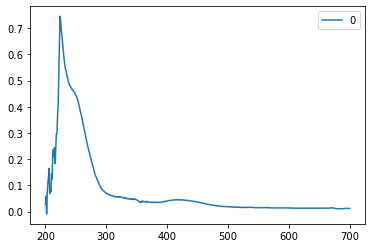

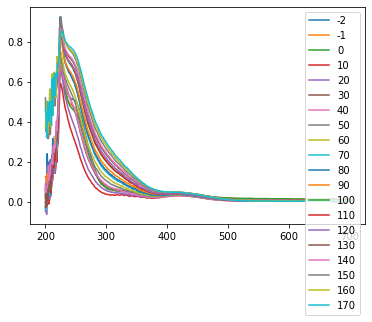

In [16]:
data[{0}].plot()
data.plot()

Как видно на втором графике, картинки получились некаистые и непонятные. Чтобы это исправить можно воспользоваться ключами, которые подробно описаны в документации к функции. Они во многом похожи на те, что используются в блиблиотеке `matplotlib`. 

Например, можно задать гамму, благодаря которой последовательные кривые будут строиться с использованием последовательности цветов, что полезно при визуализации данных с временным разрешением, или для того, чтобы визуализировать плавно изменяющиеся данные.

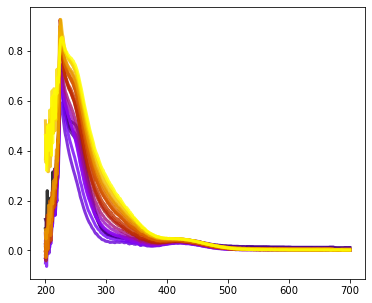

In [17]:

data.plot(cmap = 'gnuplot', #гамма из библиотеки matplotlib
          legend = False, #аргумент, указывающий на то, добавлять легенду (значение True) или  нет 'False'
          figsize=(6, 5), #аргумент, указывающий на размер картинки в дюймах
          lw = 3, #аргумент, указывающий на толщину линий, необходимо использовать только целочисленные значения
          alpha=0.8) #аргумент альфа-канала, влияет на прозрачность фона

## Манипуляции с данными.
Данные в датафреймах зачастую приходится обрабатывать одинаковыми методами. Для того, чтобы не использовать циклы для перебора строк или столбцов, полезно использовать `lamda`-функцию, это будет наиболее простой и лаконичный способ.

В нашем примере мы будем вычитать спектр исходного соединения, полученного при времени t = 0 (столбец с ключом `{0}`) из остальных столбцов. Для начала создадим новую переменную со значениями, которые мы будем вычитать.

In [18]:
first_col=data[{0}]

Затем воспользуемся функцией apply для применения математической операции ко <b>всем</b> колонкам

In [19]:
bigtable_sub=data.apply(lambda column: column - first_col[0],  
                        #column взято для удобства, можно писать любое название
                        #first_col[0] необходимо повторно указать название колонки,
                        #потому что pandas требует это делать при применении оперпций к колонкам
                        axis=0)# ключ указывает, что опреацию будем применять поколоночно

Построим что получилось с теми же ключами, как и в предыдущем случае, но в другой гамме.

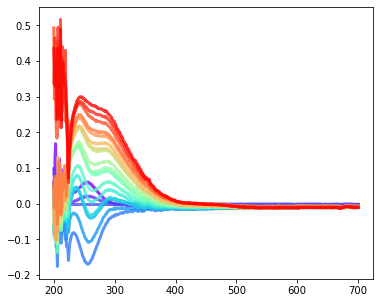

In [20]:
bigtable_sub.plot(cmap = 'rainbow', #карта цветов из библиотеки matplotlib
          legend = False, #ключ, указывающий на то, добавлять легенду (значение True) или  нет 'False'
          figsize=(6, 5), #ключ, указывающий на размер картинки в дюймах
          lw = 3, #ключ, указывающий на толщину линий, необходимо использовать только целочисленные значения
          alpha=0.8) #ключ альфа-канала, влияет на прозрачность фона

Иногда бывает необходимо взять горизонтальный срез из `dataframe`, например, чтобы проследить, как изменяется поглощение только на одной длине волны. Для таких целей существует функция `loc`, аргументом которой служит индекс нужных элементов в массиве.

In [21]:
data300 = data.loc[300]
print(data300)

-2      0.069
-1      0.070
 0      0.069
 10     0.037
 20     0.057
 30     0.081
 40     0.084
 50     0.104
 60     0.123
 70     0.150
 80     0.159
 90     0.174
 100    0.201
 110    0.206
 120    0.216
 130    0.237
 140    0.244
 150    0.264
 160    0.281
 170    0.297
Name: 300.0, dtype: float64


Эти данные можно использовать для построения кинетических кривых

Text(0, 0.5, 'Absorption')

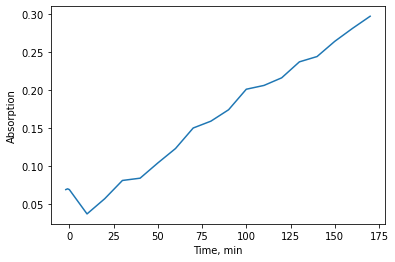

In [24]:
ax=data300.plot()
ax.set_xlabel("Time, min") #название оси x
ax.set_ylabel("Absorption")   #название оси y